<a href="https://colab.research.google.com/github/gmauricio-toledo/MetodosNumericos/blob/main/Vectorizaci%C3%B3n%20en%20Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vectorización en Numpy

En esta notebook se presentan ejemplos de vectorización en Numpy, es decir aritmética de arreglos de Numpy.

Usaremos esta vectorización para simplificar los algoritmos de la regresión lineal y polinomial.

## Los datos

In [1]:
import numpy as np

A = np.array([[1,0],[4,1],[6,7],[7,8]], dtype=float)

Los graficamos

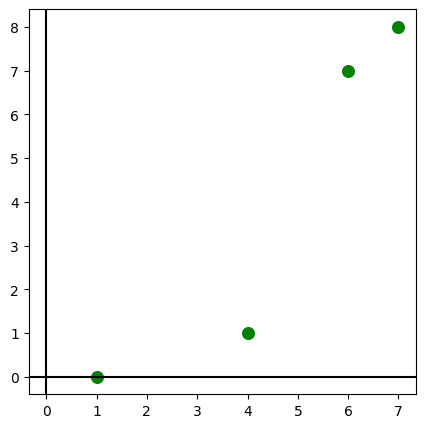

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(A[:,0],A[:,1],color='green',s=70)
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.show()

In [3]:
print(A)

[[1. 0.]
 [4. 1.]
 [6. 7.]
 [7. 8.]]


## Cálculo de las diferentes variables

El número de datos

In [4]:
n = A.shape[0]
n

4

Calculamos $\sum x_i$ y $\sum y_i$

In [5]:
sumas = np.sum(A,axis=0)
sum_x = sumas[0]
sum_y = sumas[1]

print(sum_x,sum_y)

18.0 16.0


Extraemos los vectores de valores $x_i$ y $y_i$

In [6]:
xs = A[:,0]
ys = A[:,1]

print(xs,ys)

[1. 4. 6. 7.] [0. 1. 7. 8.]


Calculamos $\sum x_i y_i$

In [7]:
sum_xy = np.sum(xs*ys)
print(sum_xy)

102.0


Calculamos $\sum x_i^2$

In [8]:
sum_xx = np.sum(xs*xs)
print(sum_xx)

102.0


Calculamos los promedios $\overline{x_i}$, $\overline{y_i}$

In [9]:
prom_xs = np.mean(xs)
prom_ys = np.mean(ys)

print(prom_xs,prom_ys)

4.5 4.0


## Cálculo de los coeficientes $m$ y $b$

In [10]:
m = (n*sum_xy-sum_x*sum_y)/(n*sum_xx-sum_x**2)
b = prom_ys - prom_xs*m
print(m,b)

1.4285714285714286 -2.428571428571429


## Obtener la aproximación para los valores $x_i$

Definimos la función que realiza la predicción de nuevos valores

In [11]:
def f(x):
    return m*x+b

Evaluamos la función $f$ en todos los valores de $x$

In [12]:
f(xs)

array([-1.        ,  3.28571429,  6.14285714,  7.57142857])

## Cálculo de los errores respecto a la aproximación

In [13]:
errores = np.sum((ys - f(xs))**2)
print(errores)

7.142857142857144


## Comparación con una implementación de Python

scikit-learn es un módulo de Python con la mayoria de los algoritmos de aprendizaje automático, entre ellos la regresión lineal

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(A[:,0].reshape(-1,1),A[:,1])
print(f"m: {lr.coef_[0]}")
print(f"b: {lr.intercept_}")
print(f"Coeficiente de determinación: {lr.score(A[:,0].reshape(-1,1),A[:,1])}")

m: 1.428571428571428
b: -2.4285714285714253
Coeficiente de determinación: 0.8571428571428572


## Regresión Polinomial

Para la regresión polinomial es un procedimiento análogo. La única diferencia es que, al final, hay que armar una matriz que luego se resolverá por eliminación gaussiana.

Podemos definir la matriz especificando todas sus entradas. Aquí aún faltan de rellenar algunos huecos, esos huecos los llenamos con valores `nan` (not a number).

In [15]:
matriz = np.array([[n,sum_x,sum_xx],[sum_x,sum_xx,np.nan],[sum_xx,np.nan,np.nan]])
matriz

array([[  4.,  18., 102.],
       [ 18., 102.,  nan],
       [102.,  nan,  nan]])

In [17]:
vector_b = np.array([sum_y,sum_xy,np.nan])
print(vector_b)

[ 16. 102.  nan]


También podemos definir una matriz de ceros y luego llenarla entrada por entrada. Este método será útil en la implementación de los splines.

In [ ]:
matriz = np.zeros(shape=(3,3))
matriz

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
matriz[0,2] = sum_xx
matriz

array([[  0.,   0., 102.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.]])